**Comprehensive Machine Learning Approach to Diagnose Dementia**

In [ ]:
pip install -U scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 24.7 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [ ]:
!python -m pip show scikit-learn

Name: scikit-learn
Version: 1.4.2
Summary: A set of python modules for machine learning and data mining
Home-page: https://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: /usr/local/lib/python3.10/dist-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: bigframes, fastai, imbalanced-learn, librosa, mlxtend, qudida, sklearn-pandas, yellowbrick


In [ ]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB

In [ ]:
database = pd.read_csv('data.csv')

In [ ]:
database.head()

,Diabetic,AlcoholLevel,HeartRate,BloodOxygenLevel,BodyTemperature,Weight,MRI_Delay,Prescription,Dosage in mg,Age,...,Smoking_Status,APOE_ε4,Physical_Activity,Depression_Status,Cognitive_Test_Scores,Medication_History,Nutrition_Diet,Sleep_Quality,Chronic_Health_Conditions,Dementia
0,1,0.084974,98,96.230743,36.224852,57.563978,36.421028,NaN,NaN,60,...,Current Smoker,Negative,Sedentary,No,10,No,Low-Carb Diet,Poor,Diabetes,0
1,0,0.016973,78,93.032122,36.183874,56.832335,31.157633,Galantamine,12.0,61,...,Former Smoker,Positive,Moderate Activity,No,1,Yes,Low-Carb Diet,Poor,Heart Disease,1
2,0,0.009000,89,93.566504,37.326321,59.759066,37.640435,NaN,NaN,69,...,Former Smoker,Negative,Moderate Activity,No,8,No,Mediterranean Diet,Poor,Heart Disease,0
3,0,0.086437,60,93.906510,37.030620,58.266471,50.673992,Donepezil,23.0,78,...,Never Smoked,Negative,Mild Activity,Yes,5,Yes,Balanced Diet,Poor,Hypertension,1
4,1,0.150747,67,97.508994,36.062121,67.705027,27.810601,Memantine,20.0,77,...,Never Smoked,Positive,Mild Activity,No,0,Yes,Low-Carb Diet,Good,Diabetes,1


In [ ]:
database.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Diabetic                   1000 non-null   int64  
 1   AlcoholLevel               1000 non-null   float64
 2   HeartRate                  1000 non-null   int64  
 3   BloodOxygenLevel           1000 non-null   float64
 4   BodyTemperature            1000 non-null   float64
 5   Weight                     1000 non-null   float64
 6   MRI_Delay                  1000 non-null   float64
 7   Prescription               485 non-null    object 
 8   Dosage in mg               485 non-null    float64
 9   Age                        1000 non-null   int64  
 10  Education_Level            1000 non-null   object 
 11  Dominant_Hand              1000 non-null   object 
 12  Gender                     1000 non-null   object 
 13  Family_History             1000 non-null   object

In [ ]:
database.shape

(1000, 24)

In [ ]:
database.isnull().sum()

Diabetic                       0
AlcoholLevel                   0
HeartRate                      0
BloodOxygenLevel               0
BodyTemperature                0
Weight                         0
MRI_Delay                      0
Prescription                 515
Dosage in mg                 515
Age                            0
Education_Level                0
Dominant_Hand                  0
Gender                         0
Family_History                 0
Smoking_Status                 0
APOE_ε4                        0
Physical_Activity              0
Depression_Status              0
Cognitive_Test_Scores          0
Medication_History             0
Nutrition_Diet                 0
Sleep_Quality                  0
Chronic_Health_Conditions    179
Dementia                       0
dtype: int64

In [ ]:
database.keys()

Index(['Diabetic', 'AlcoholLevel', 'HeartRate', 'BloodOxygenLevel',
       'BodyTemperature', 'Weight', 'MRI_Delay', 'Prescription',
       'Dosage in mg', 'Age', 'Education_Level', 'Dominant_Hand', 'Gender',
       'Family_History', 'Smoking_Status', 'APOE_ε4', 'Physical_Activity',
       'Depression_Status', 'Cognitive_Test_Scores', 'Medication_History',
       'Nutrition_Diet', 'Sleep_Quality', 'Chronic_Health_Conditions',
       'Dementia'],
      dtype='object')

In [ ]:
database['Prescription'].fillna('Not prescribed', inplace=True)

In [ ]:
impute = SimpleImputer(missing_values=np.nan, strategy='mean')
impute.fit(database[['Dosage in mg']])
database['Dosage in mg'] = impute.transform(database[['Dosage in mg']])

In [ ]:
print("Shape of dataframe before dropping rows:", database.shape)
database = database.dropna(axis = 0, subset = ['Chronic_Health_Conditions'])
print("Shape after dropping rows:", database.shape)

Shape of dataframe before dropping rows: (1000, 24)
Shape after dropping rows: (821, 24)


In [ ]:
database.isnull().sum()

Diabetic                     0
AlcoholLevel                 0
HeartRate                    0
BloodOxygenLevel             0
BodyTemperature              0
Weight                       0
MRI_Delay                    0
Prescription                 0
Dosage in mg                 0
Age                          0
Education_Level              0
Dominant_Hand                0
Gender                       0
Family_History               0
Smoking_Status               0
APOE_ε4                      0
Physical_Activity            0
Depression_Status            0
Cognitive_Test_Scores        0
Medication_History           0
Nutrition_Diet               0
Sleep_Quality                0
Chronic_Health_Conditions    0
Dementia                     0
dtype: int64

In [ ]:
database.shape

(821, 24)

**Encoding**

In [ ]:
encoding = LabelEncoder()
database['prescription_enc'] = encoding.fit_transform(database['Prescription'])
database[['Prescription','prescription_enc']]

<ipython-input-15-ed56325c2373>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  database['prescription_enc'] = encoding.fit_transform(database['Prescription'])


,Prescription,prescription_enc
0,Not prescribed,3
1,Galantamine,1
2,Not prescribed,3
3,Donepezil,0
4,Memantine,2
...,...,...
994,Galantamine,1
995,Donepezil,0
996,Not prescribed,3
997,Not prescribed,3


In [ ]:
encoding = LabelEncoder()
database['education_enc'] = encoding.fit_transform(database['Education_Level'])
database[['Education_Level','education_enc']]

<ipython-input-16-389c8b2d60a1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  database['education_enc'] = encoding.fit_transform(database['Education_Level'])


,Education_Level,education_enc
0,Primary School,2
1,Secondary School,3
2,Primary School,2
3,Secondary School,3
4,Secondary School,3
...,...,...
994,No School,1
995,Diploma/Degree,0
996,Primary School,2
997,Primary School,2


In [ ]:
encoding = LabelEncoder()
database['dominant_enc'] = encoding.fit_transform(database['Dominant_Hand'])
database[['Dominant_Hand','dominant_enc']]

,Dominant_Hand,dominant_enc
0,Left,0
1,Right,1
2,Right,1
3,Left,0
4,Right,1
...,...,...
994,Right,1
995,Left,0
996,Left,0
997,Right,1


In [ ]:
encoding = LabelEncoder()
database['gender_enc'] = encoding.fit_transform(database['Gender'])
database[['Gender','gender_enc']]

,Gender,gender_enc
0,Female,0
1,Male,1
2,Male,1
3,Female,0
4,Male,1
...,...,...
994,Female,0
995,Male,1
996,Female,0
997,Female,0


In [ ]:
encoding = LabelEncoder()
database['family_enc'] = encoding.fit_transform(database['Family_History'])
database[['Family_History','family_enc']]

,Family_History,family_enc
0,No,0
1,No,0
2,Yes,1
3,Yes,1
4,Yes,1
...,...,...
994,Yes,1
995,Yes,1
996,No,0
997,No,0


In [ ]:
encoding = LabelEncoder()
database['smoking_enc'] = encoding.fit_transform(database['Smoking_Status'])
database[['Smoking_Status','smoking_enc']]

,Smoking_Status,smoking_enc
0,Current Smoker,0
1,Former Smoker,1
2,Former Smoker,1
3,Never Smoked,2
4,Never Smoked,2
...,...,...
994,Former Smoker,1
995,Never Smoked,2
996,Never Smoked,2
997,Never Smoked,2


In [ ]:
encoding = LabelEncoder()
database['apoe_enc'] = encoding.fit_transform(database['APOE_ε4'])
database[['APOE_ε4','apoe_enc']]

,APOE_ε4,apoe_enc
0,Negative,0
1,Positive,1
2,Negative,0
3,Negative,0
4,Positive,1
...,...,...
994,Positive,1
995,Positive,1
996,Negative,0
997,Positive,1


In [ ]:
encoding = LabelEncoder()
database['physical_enc'] = encoding.fit_transform(database['Physical_Activity'])
database[['Physical_Activity','physical_enc']]

,Physical_Activity,physical_enc
0,Sedentary,2
1,Moderate Activity,1
2,Moderate Activity,1
3,Mild Activity,0
4,Mild Activity,0
...,...,...
994,Moderate Activity,1
995,Mild Activity,0
996,Moderate Activity,1
997,Sedentary,2


In [ ]:
encoding = LabelEncoder()
database['depression_enc'] = encoding.fit_transform(database['Depression_Status'])
database[['Depression_Status','depression_enc']]

,Depression_Status,depression_enc
0,No,0
1,No,0
2,No,0
3,Yes,1
4,No,0
...,...,...
994,No,0
995,No,0
996,No,0
997,No,0


In [ ]:
encoding = LabelEncoder()
database['medication_enc'] = encoding.fit_transform(database['Medication_History'])
database[['Medication_History','medication_enc']]

,Medication_History,medication_enc
0,No,0
1,Yes,1
2,No,0
3,Yes,1
4,Yes,1
...,...,...
994,No,0
995,No,0
996,Yes,1
997,Yes,1


In [ ]:
encoding = LabelEncoder()
database['nutrition_enc'] = encoding.fit_transform(database['Nutrition_Diet'])
database[['Nutrition_Diet','nutrition_enc']]

,Nutrition_Diet,nutrition_enc
0,Low-Carb Diet,1
1,Low-Carb Diet,1
2,Mediterranean Diet,2
3,Balanced Diet,0
4,Low-Carb Diet,1
...,...,...
994,Low-Carb Diet,1
995,Balanced Diet,0
996,Low-Carb Diet,1
997,Balanced Diet,0


In [ ]:
encoding = LabelEncoder()
database['sleep_enc'] = encoding.fit_transform(database['Sleep_Quality'])
database[['Sleep_Quality','sleep_enc']]

,Sleep_Quality,sleep_enc
0,Poor,1
1,Poor,1
2,Poor,1
3,Poor,1
4,Good,0
...,...,...
994,Poor,1
995,Poor,1
996,Poor,1
997,Good,0


In [ ]:
encoding = LabelEncoder()
database['chronic_enc'] = encoding.fit_transform(database['Chronic_Health_Conditions'])
database[['Chronic_Health_Conditions','chronic_enc']]

,Chronic_Health_Conditions,chronic_enc
0,Diabetes,0
1,Heart Disease,1
2,Heart Disease,1
3,Hypertension,2
4,Diabetes,0
...,...,...
994,Diabetes,0
995,Diabetes,0
996,Diabetes,0
997,Diabetes,0


In [ ]:
database.keys()

Index(['Diabetic', 'AlcoholLevel', 'HeartRate', 'BloodOxygenLevel',
       'BodyTemperature', 'Weight', 'MRI_Delay', 'Prescription',
       'Dosage in mg', 'Age', 'Education_Level', 'Dominant_Hand', 'Gender',
       'Family_History', 'Smoking_Status', 'APOE_ε4', 'Physical_Activity',
       'Depression_Status', 'Cognitive_Test_Scores', 'Medication_History',
       'Nutrition_Diet', 'Sleep_Quality', 'Chronic_Health_Conditions',
       'Dementia', 'prescription_enc', 'education_enc', 'dominant_enc',
       'gender_enc', 'family_enc', 'smoking_enc', 'apoe_enc', 'physical_enc',
       'depression_enc', 'medication_enc', 'nutrition_enc', 'sleep_enc',
       'chronic_enc'],
      dtype='object')

In [ ]:
database_encoded= database[['Diabetic', 'AlcoholLevel', 'HeartRate', 'BloodOxygenLevel',
       'BodyTemperature', 'Weight', 'MRI_Delay', 'prescription_enc', 'Dosage in mg', 'Age', 'education_enc', 'dominant_enc',
       'gender_enc', 'family_enc', 'smoking_enc', 'apoe_enc', 'physical_enc',
       'depression_enc', 'Cognitive_Test_Scores', 'medication_enc', 'nutrition_enc', 'sleep_enc',
       'chronic_enc', 'Dementia']]

In [ ]:
database_encoded.head()

,Diabetic,AlcoholLevel,HeartRate,BloodOxygenLevel,BodyTemperature,Weight,MRI_Delay,prescription_enc,Dosage in mg,Age,...,smoking_enc,apoe_enc,physical_enc,depression_enc,Cognitive_Test_Scores,medication_enc,nutrition_enc,sleep_enc,chronic_enc,Dementia
0,1,0.084974,98,96.230743,36.224852,57.563978,36.421028,3,9.213402,60,...,0,0,2,0,10,0,1,1,0,0
1,0,0.016973,78,93.032122,36.183874,56.832335,31.157633,1,12.000000,61,...,1,1,1,0,1,1,1,1,1,1
2,0,0.009000,89,93.566504,37.326321,59.759066,37.640435,3,9.213402,69,...,1,0,1,0,8,0,2,1,1,0
3,0,0.086437,60,93.906510,37.030620,58.266471,50.673992,0,23.000000,78,...,2,0,0,1,5,1,0,1,2,1
4,1,0.150747,67,97.508994,36.062121,67.705027,27.810601,2,20.000000,77,...,2,1,0,0,0,1,1,0,0,1


In [ ]:
database_encoded.keys()

Index(['Diabetic', 'AlcoholLevel', 'HeartRate', 'BloodOxygenLevel',
       'BodyTemperature', 'Weight', 'MRI_Delay', 'prescription_enc',
       'Dosage in mg', 'Age', 'education_enc', 'dominant_enc', 'gender_enc',
       'family_enc', 'smoking_enc', 'apoe_enc', 'physical_enc',
       'depression_enc', 'Cognitive_Test_Scores', 'medication_enc',
       'nutrition_enc', 'sleep_enc', 'chronic_enc', 'Dementia'],
      dtype='object')

In [ ]:
dc=database_encoded.corr()
dc

,Diabetic,AlcoholLevel,HeartRate,BloodOxygenLevel,BodyTemperature,Weight,MRI_Delay,prescription_enc,Dosage in mg,Age,...,smoking_enc,apoe_enc,physical_enc,depression_enc,Cognitive_Test_Scores,medication_enc,nutrition_enc,sleep_enc,chronic_enc,Dementia
Diabetic,1.000000,0.018291,-0.012359,-0.007850,-0.038291,-0.016832,-0.039423,-0.062259,0.019766,0.029184,...,-0.004776,0.035245,-0.001536,0.023621,-0.058257,-0.014778,0.029040,-0.059522,-0.921127,0.060085
AlcoholLevel,0.018291,1.000000,-0.040415,-0.003461,0.002387,0.022058,-0.003903,0.014180,0.019116,-0.028247,...,0.030256,0.038847,-0.015578,0.019623,-0.028762,-0.063661,-0.001059,0.057080,-0.000769,0.003116
HeartRate,-0.012359,-0.040415,1.000000,0.043052,0.015585,0.021776,-0.004725,-0.004008,-0.036867,0.036579,...,0.006713,0.064023,-0.008760,-0.002539,0.003935,0.022843,0.061117,-0.023424,0.027136,0.015629
BloodOxygenLevel,-0.007850,-0.003461,0.043052,1.000000,-0.012077,-0.015927,-0.012751,0.031094,-0.010253,0.012426,...,-0.023207,-0.018271,-0.035363,-0.036208,0.070280,-0.028313,0.003301,0.029606,0.014518,-0.084625
BodyTemperature,-0.038291,0.002387,0.015585,-0.012077,1.000000,-0.020222,0.025360,-0.032481,0.049193,-0.009371,...,-0.003331,0.083838,-0.032983,0.020338,-0.011682,0.020911,-0.028418,0.006589,0.024530,0.034712
Weight,-0.016832,0.022058,0.021776,-0.015927,-0.020222,1.000000,-0.029884,0.008678,-0.006602,0.005855,...,-0.007804,-0.065986,0.000072,-0.030991,0.036758,-0.071020,0.013040,0.019480,0.026377,-0.043858
MRI_Delay,-0.039423,-0.003903,-0.004725,-0.012751,0.025360,-0.029884,1.000000,-0.008454,-0.072376,-0.010800,...,0.020670,-0.019800,-0.026417,0.079271,-0.055999,0.033865,-0.004087,-0.018255,0.009168,0.036008
prescription_enc,-0.062259,0.014180,-0.004008,0.031094,-0.032481,0.008678,-0.008454,1.000000,-0.471093,0.043614,...,-0.091159,-0.237828,0.041635,-0.270175,0.436234,0.033967,-0.039333,0.024642,0.056701,-0.515311
Dosage in mg,0.019766,0.019116,-0.036867,-0.010253,0.049193,-0.006602,-0.072376,-0.471093,1.000000,0.009723,...,-0.019532,-0.004870,-0.008017,0.009414,-0.021645,-0.059678,-0.016136,0.011603,-0.015551,0.008390
Age,0.029184,-0.028247,0.036579,0.012426,-0.009371,0.005855,-0.010800,0.043614,0.009723,1.000000,...,-0.017562,-0.016534,0.033771,-0.055433,0.073527,-0.045493,0.081836,0.007526,-0.036589,-0.078880


<Axes: >

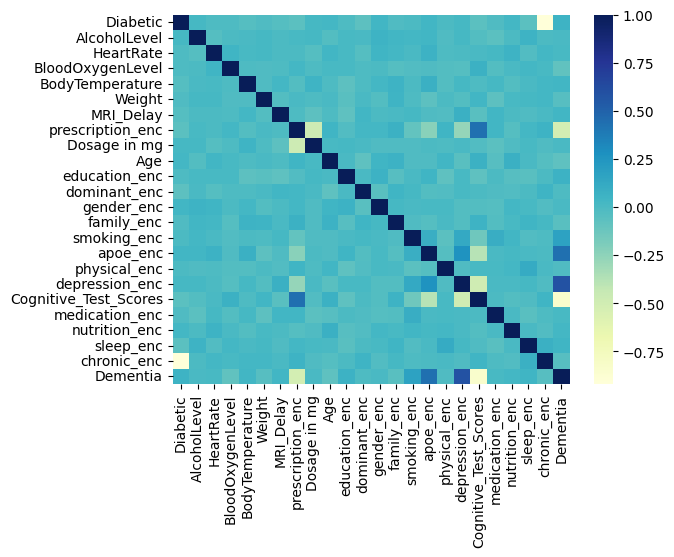

In [ ]:
sns.heatmap(dc, cmap='YlGnBu')

In [ ]:
# Find columns where correlation is greater than 0.75 at least twice
high_correlation = dc[(dc >= 0.75) & (dc <= 1.0)].count() >= 2
correlated =high_correlation[high_correlation].index
print('Highly Positive Correlated:',list(correlated))

Highly Positive Correlated: []


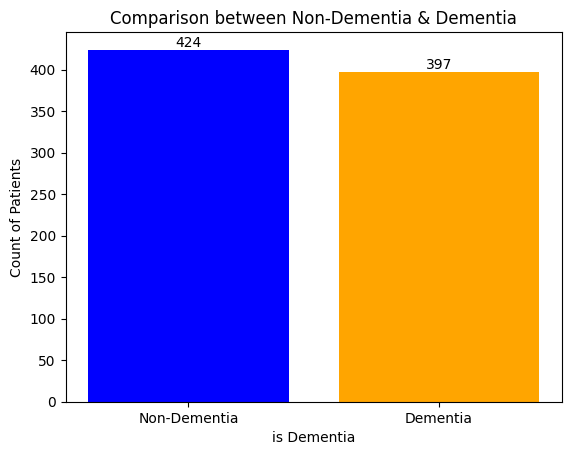

In [ ]:
class_counts = database['Dementia'].value_counts()
colors = ['blue','orange']
bars=plt.bar(class_counts.index, class_counts.values, color=colors)
plt.xticks(class_counts.index, ['Non-Dementia', 'Dementia'])
plt.xlabel('is Dementia')
plt.ylabel('Count of Patients')
plt.title('Comparison between Non-Dementia & Dementia')

for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),str(bar.get_height()), ha='center', va='bottom')

plt.show()

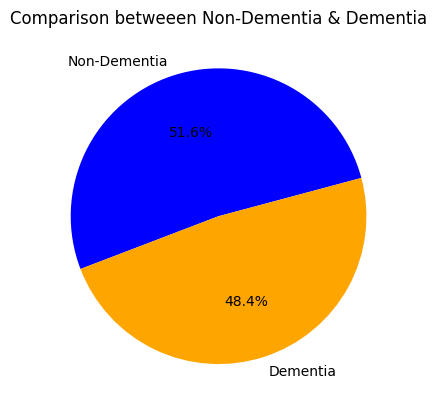

In [ ]:
class_counts = database['Dementia'].value_counts()
labels = ['Non-Dementia', 'Dementia']
sizes = class_counts.values
colors = ['blue', 'orange']
plt.pie(sizes, labels=labels,autopct='%1.1f%%', startangle=15,colors=colors)
plt.title('Comparison betweeen Non-Dementia & Dementia')
plt.show()

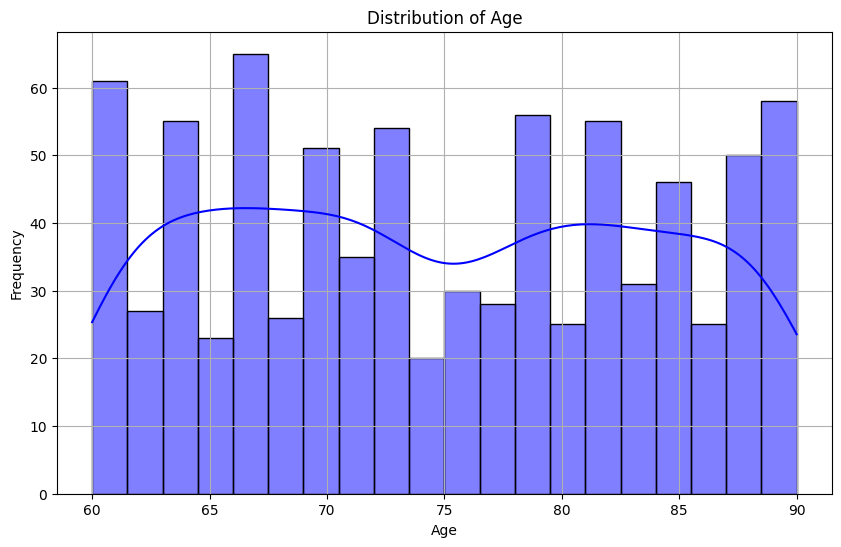

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(database['Age'], bins=20, kde=True, color='blue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

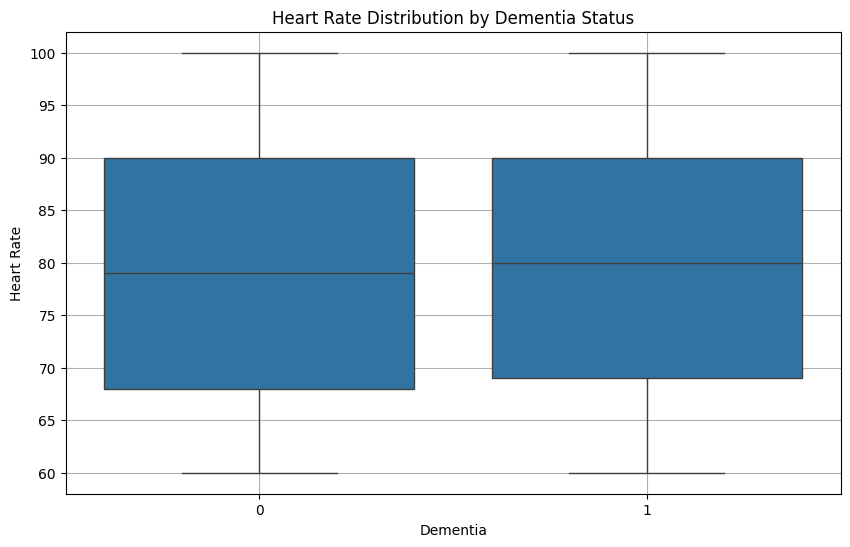

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Dementia', y='HeartRate', data=database)
plt.title('Heart Rate Distribution by Dementia Status')
plt.xlabel('Dementia')
plt.ylabel('Heart Rate')
plt.grid(True)
plt.show()

**Train-Test Data**

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(database[['Diabetic', 'AlcoholLevel', 'HeartRate', 'BloodOxygenLevel',
       'BodyTemperature', 'Weight', 'MRI_Delay', 'prescription_enc',
       'Dosage in mg', 'Age', 'education_enc', 'dominant_enc', 'gender_enc',
       'family_enc', 'smoking_enc', 'apoe_enc', 'physical_enc',
       'depression_enc', 'Cognitive_Test_Scores', 'medication_enc',
       'nutrition_enc', 'sleep_enc', 'chronic_enc']], database['Dementia'], test_size=0.3, random_state=0)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(574, 23)
(247, 23)
(574,)
(247,)


In [ ]:
x_train

,Diabetic,AlcoholLevel,HeartRate,BloodOxygenLevel,BodyTemperature,Weight,MRI_Delay,prescription_enc,Dosage in mg,Age,...,family_enc,smoking_enc,apoe_enc,physical_enc,depression_enc,Cognitive_Test_Scores,medication_enc,nutrition_enc,sleep_enc,chronic_enc
359,1,0.110548,69,96.728603,36.269411,83.068987,10.571330,2,5.000000,88,...,0,1,1,2,0,6,1,2,1,0
612,1,0.043775,88,98.336472,36.498193,53.520429,43.723821,0,5.000000,86,...,1,1,1,0,1,1,0,2,0,0
24,1,0.155994,77,99.716844,36.755959,64.594698,24.792448,3,9.213402,75,...,1,2,1,1,0,9,0,0,1,0
793,1,0.045819,91,93.742253,37.070022,79.516124,41.818244,3,9.213402,73,...,1,0,1,1,0,10,1,2,0,0
564,0,0.022607,100,95.938040,36.846273,84.224879,36.411420,3,9.213402,89,...,1,0,1,2,0,9,0,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
937,0,0.123615,91,96.123404,37.101817,73.115638,11.932542,2,20.000000,76,...,0,2,1,2,0,7,0,2,1,2
229,1,0.164798,97,93.311591,36.646700,56.883709,54.699054,0,10.000000,64,...,0,2,1,0,1,4,0,2,0,0
767,0,0.163544,69,91.951138,37.456156,70.045920,1.894923,3,9.213402,89,...,1,1,1,1,0,8,0,2,1,2
675,0,0.133204,84,98.824501,37.421436,85.672477,13.029881,3,9.213402,75,...,0,2,1,0,0,8,0,0,0,1


In [ ]:
y_train

359    1
612    1
24     0
793    0
564    0
      ..
937    1
229    1
767    0
675    0
835    1
Name: Dementia, Length: 574, dtype: int64

In [ ]:
scaler1 = MinMaxScaler()
scaler1.fit(x_train)
x_train_MinMaxscaled = scaler1.transform(x_train)
x_test_MinMaxscaled = scaler1.transform(x_test)

In [ ]:
x_train_MinMaxscaled

array([[1.        , 0.5546922 , 0.225     , ..., 1.        , 1.        ,
        0.        ],
       [1.        , 0.21839061, 0.7       , ..., 1.        , 0.        ,
        0.        ],
       [1.        , 0.78358516, 0.425     , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.        , 0.82161194, 0.225     , ..., 1.        , 1.        ,
        1.        ],
       [0.        , 0.6688017 , 0.6       , ..., 0.        , 0.        ,
        0.5       ],
       [1.        , 0.34845179, 0.175     , ..., 0.        , 0.        ,
        0.        ]])

**KNN**

In [ ]:
KNN=KNeighborsClassifier(n_neighbors=3)
KNN.fit(x_train_MinMaxscaled, y_train)
y_prediction1=KNN.predict(x_test_MinMaxscaled)
knn_accurate=KNN.score(x_test_MinMaxscaled,y_test)*100
knn_error=100-knn_accurate
print("Accuracy is:",knn_accurate)
print("Error is:",knn_error)

Accuracy is: 86.63967611336032
Error is: 13.360323886639677


In [ ]:
print(classification_report(y_test, y_prediction1))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88       133
           1       0.89      0.82      0.85       114

    accuracy                           0.87       247
   macro avg       0.87      0.86      0.86       247
weighted avg       0.87      0.87      0.87       247



[[121  21]
 [ 12  93]]


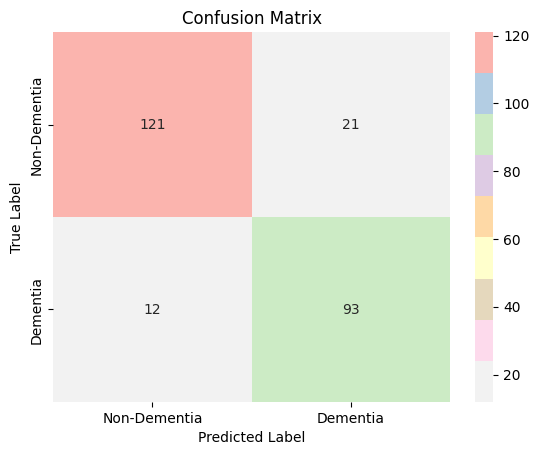

In [ ]:
mat1=confusion_matrix(y_prediction1,y_test)
print(mat1)
decimal_places=0
sns.heatmap(mat1 ,cmap="Pastel1_r", xticklabels=['Non-Dementia','Dementia'], yticklabels=['Non-Dementia','Dementia'], annot=True,fmt=f'.{decimal_places}f')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


**Logistic Regression**

In [ ]:
logistic_regression = LogisticRegression()
logistic_regression.fit(x_train_MinMaxscaled,y_train)
y_prediction2 = logistic_regression.predict(x_test_MinMaxscaled)
logistic_regression_accurate= logistic_regression.score(x_test_MinMaxscaled,y_test)*100
logistic_regression_error=100-logistic_regression_accurate
print("Accuracy is:",logistic_regression_accurate)
print("Error is:",logistic_regression_error)

Accuracy is: 99.59514170040485
Error is: 0.40485829959514774


In [ ]:
print(classification_report(y_test, y_prediction2))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       133
           1       1.00      0.99      1.00       114

    accuracy                           1.00       247
   macro avg       1.00      1.00      1.00       247
weighted avg       1.00      1.00      1.00       247



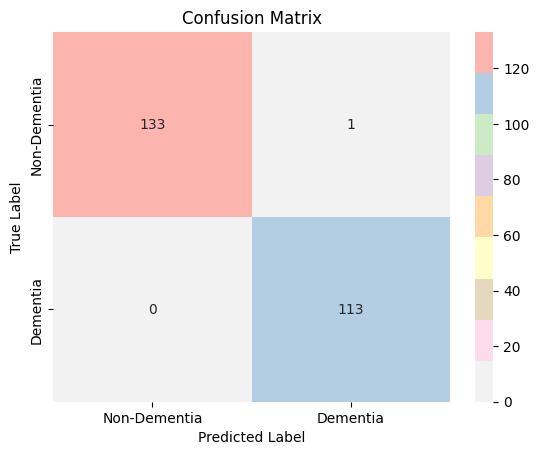

In [ ]:
mat2=confusion_matrix(y_prediction2,y_test)
decimal_places=0
sns.heatmap(mat2 ,cmap="Pastel1_r", xticklabels=['Non-Dementia','Dementia'], yticklabels=['Non-Dementia','Dementia'], annot=True,fmt=f'.{decimal_places}f')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

**AdaBoost**

In [ ]:
ada = AdaBoostClassifier(n_estimators=100)
ada.fit(x_train_MinMaxscaled,y_train)
y_prediction3= ada.predict(x_test_MinMaxscaled)
adaboost_accurate= ada.score(x_test_MinMaxscaled,y_test)*100
adaboost_error=100-adaboost_accurate
print("Accuracy is:",adaboost_accurate)
print("Error is:",adaboost_error)

Accuracy is: 100.0
Error is: 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [ ]:
print(classification_report(y_test, y_prediction3))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       133
           1       1.00      1.00      1.00       114

    accuracy                           1.00       247
   macro avg       1.00      1.00      1.00       247
weighted avg       1.00      1.00      1.00       247



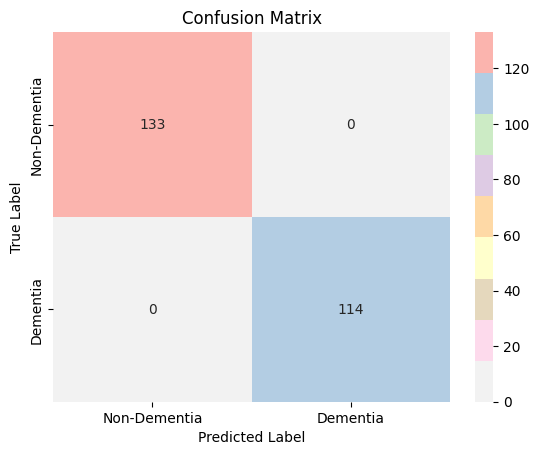

In [ ]:
mat3=confusion_matrix(y_prediction3,y_test)
decimal_places=0
sns.heatmap(mat3 ,cmap="Pastel1_r", xticklabels=['Non-Dementia','Dementia'], yticklabels=['Non-Dementia','Dementia'], annot=True,fmt=f'.{decimal_places}f')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

**Naive Bayes**

In [ ]:
GNB = GaussianNB()
GNB.fit(x_train_MinMaxscaled,y_train)
y_prediction4 = GNB.predict(x_test_MinMaxscaled)
naive_bayes_accurate=GNB.score(x_test_MinMaxscaled,y_test)*100
naive_bayes_error=100-naive_bayes_accurate
print("Accuracy is:",naive_bayes_accurate)
print("Error is:",naive_bayes_error)

Accuracy is: 100.0
Error is: 0.0


In [ ]:
print(classification_report(y_test, y_prediction4))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       133
           1       1.00      1.00      1.00       114

    accuracy                           1.00       247
   macro avg       1.00      1.00      1.00       247
weighted avg       1.00      1.00      1.00       247



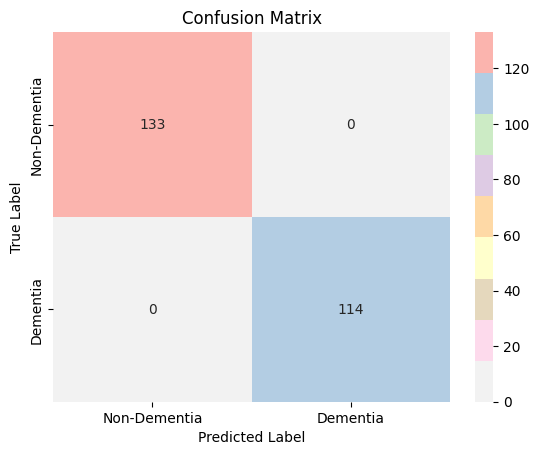

In [ ]:
mat4=confusion_matrix(y_prediction4,y_test)
decimal_places=0
sns.heatmap(mat4 ,cmap="Pastel1_r", xticklabels=['Non-Dementia','Dementia'], yticklabels=['Non-Dementia','Dementia'], annot=True,fmt=f'.{decimal_places}f')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

**Comparison**

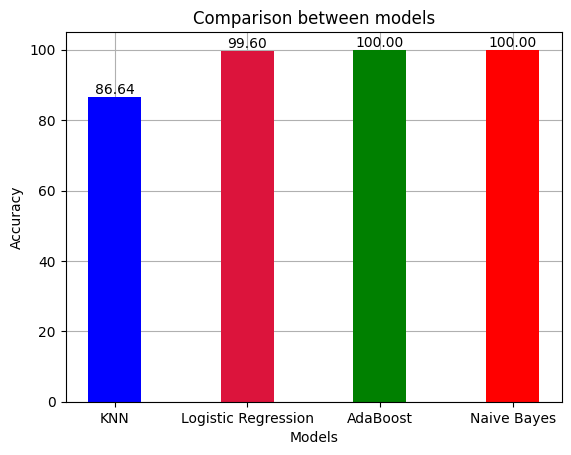

In [ ]:
accuracy = {'Model': ['KNN', 'Logistic Regression','AdaBoost', 'Naive Bayes'],
            'Accuracy': [knn_accurate, logistic_regression_accurate, adaboost_accurate, naive_bayes_accurate]}
df = pd.DataFrame(accuracy)
colors = ['blue', 'crimson', 'green', 'red']
bar_width = 0.4
bar_positions = np.arange(len(df['Model']))
bars = plt.bar(x=bar_positions, height=df['Accuracy'], width=bar_width, color=colors, zorder=2)
plt.title('Comparison between models')
plt.xlabel('Models')
plt.ylabel('Accuracy')
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{bar.get_height():.2f}', ha='center', va='bottom')
plt.grid(True, zorder=1)

plt.xticks(bar_positions, df['Model'])

plt.show()
